In [17]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [4]:
df.shape

(569, 33)

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [14]:
df = df.drop(['id','Unnamed: 32'], axis=1)

In [30]:
%matplotlib inline
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

<AxesSubplot:>

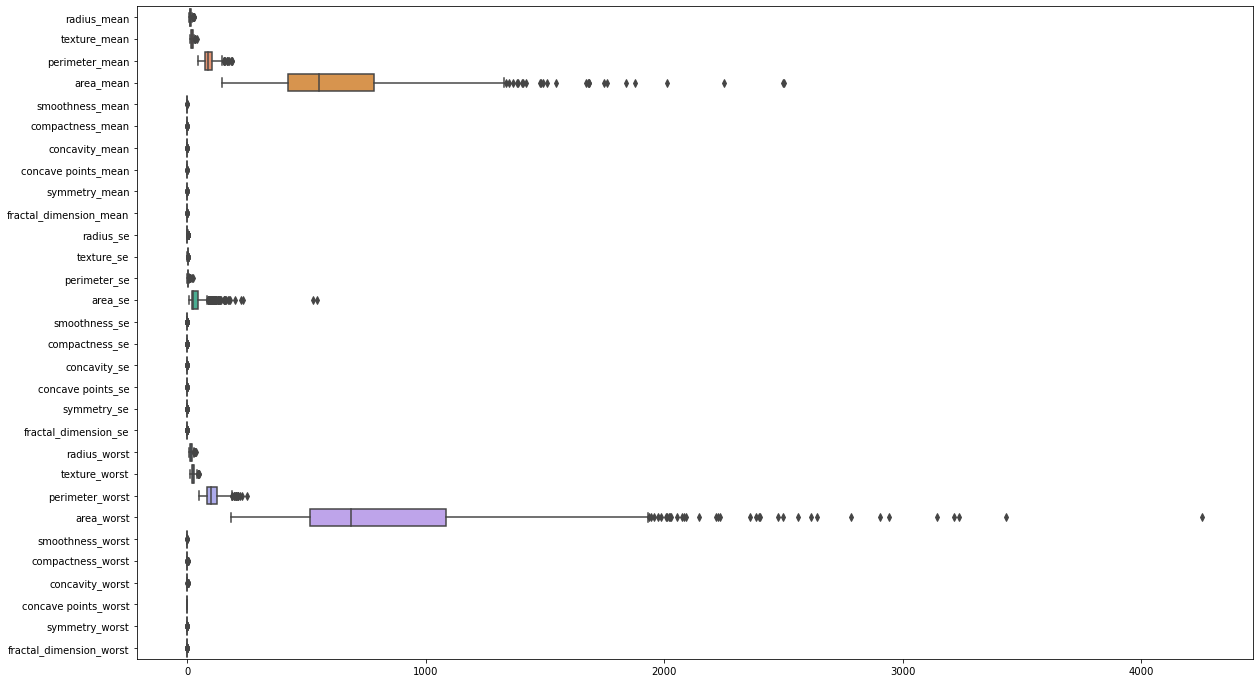

In [56]:
fig = plt.figure(figsize=(20, 12))

sns.boxplot(data=df, orient='h')


In [51]:
df_num = df.select_dtypes(exclude='object')

In [52]:
df_num_log = np.log(df_num)

<AxesSubplot:>

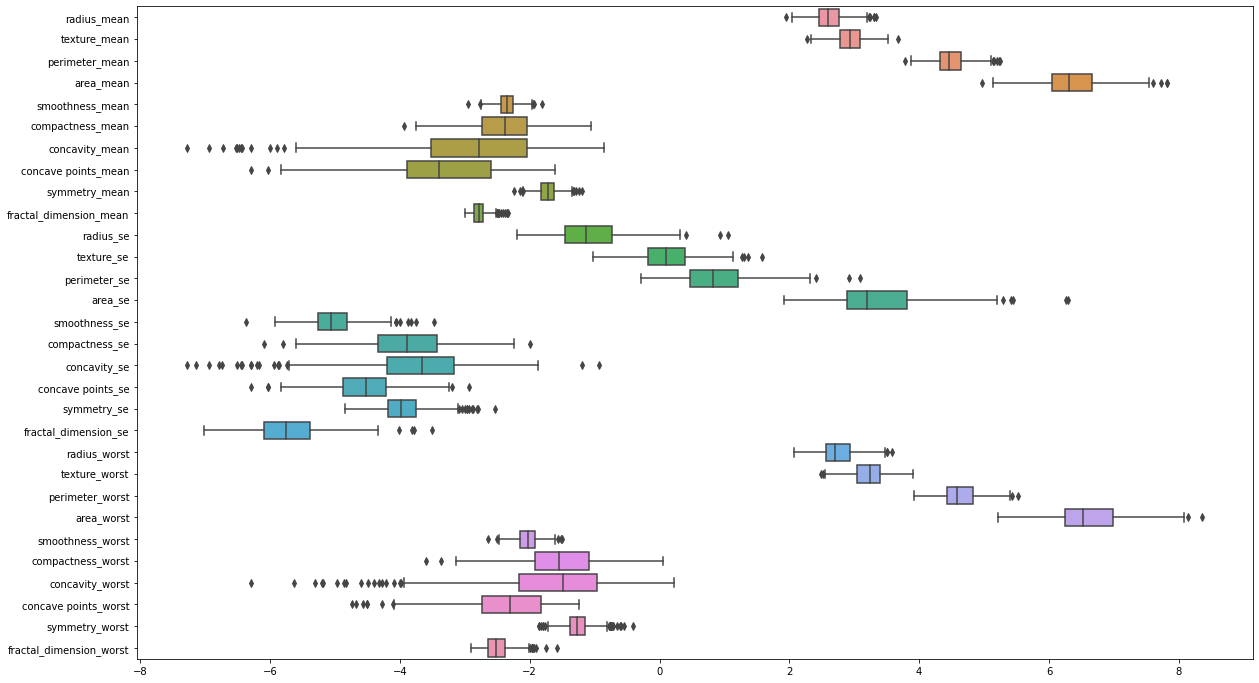

In [57]:
fig = plt.figure(figsize=(20, 12))

sns.boxplot(data=df_num_log, orient='h')

<AxesSubplot:>

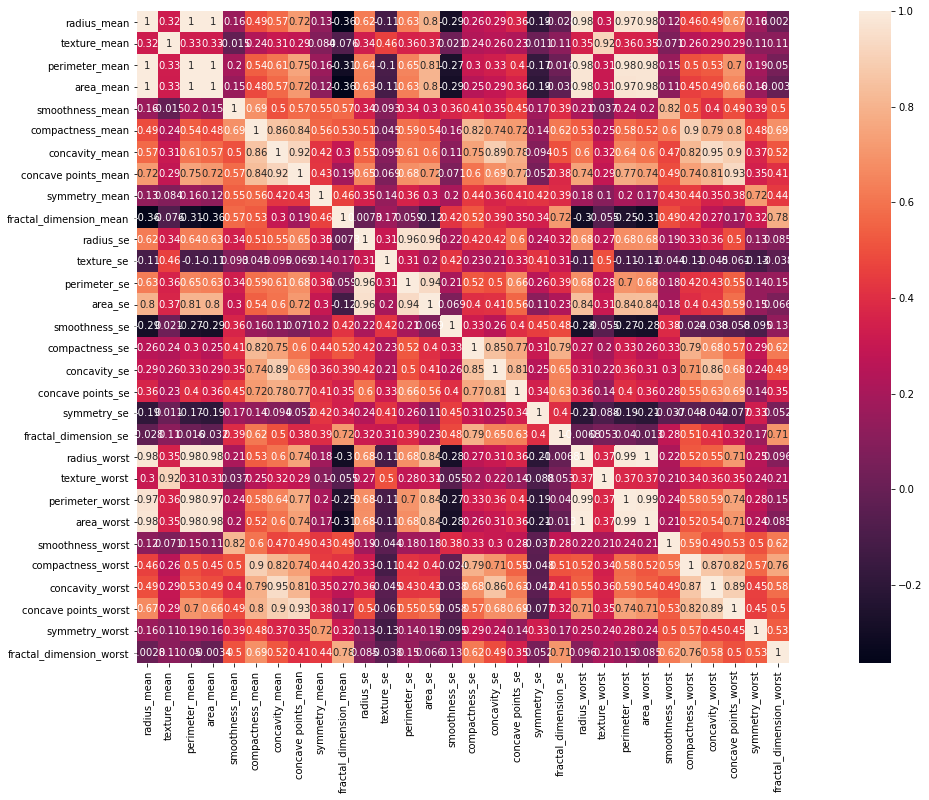

In [65]:
cr = df_num_log.corr()


fig = plt.figure(figsize=(25, 12))
sns.heatmap(cr, square=True, annot=True)

In [95]:
df_in=df_num_log

df_target = df['diagnosis']

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

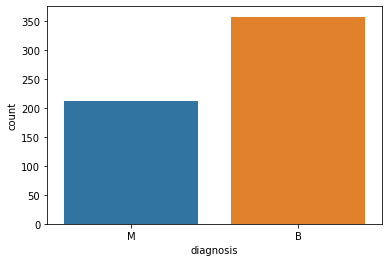

In [96]:
sns.countplot(x= df_target)

In [99]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df_target = enc.fit_transform(df_target)


In [106]:
df_in.replace([np.inf, -np.inf], np.nan, inplace=True)

In [107]:
df_in = df_in.dropna(axis=1)

In [108]:
df_in.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,2.619131,2.935269,4.489174,6.363185,-2.350210,-2.380518,-1.719430,-2.773718,-1.065554,0.104874,...,-3.948656,-5.728233,2.749578,3.217009,4.631289,6.615811,-2.037005,-1.550372,-1.258202,-2.497773
std,0.238189,0.220789,0.251084,0.483139,0.145572,0.494459,0.148229,0.106867,0.542183,0.426717,...,0.342024,0.526934,0.276438,0.240730,0.290892,0.554917,0.173086,0.617256,0.200010,0.195784
min,1.943192,2.273156,3.779405,4.966335,-2.944469,-3.943514,-2.244316,-2.996533,-2.193731,-1.021096,...,-4.843174,-7.018910,2.070653,2.486572,3.920190,5.221436,-2.642684,-3.601235,-1.854699,-2.899695
25%,2.459589,2.783158,4.319752,6.040969,-2.449115,-2.734600,-1.820776,-2.852498,-1.459295,-0.181642,...,-4.189095,-6.097714,2.565718,3.048325,4.432125,6.244749,-2.149006,-1.915963,-1.384696,-2.638617
50%,2.593013,2.935982,4.457134,6.311916,-2.344762,-2.379142,-1.719253,-2.788068,-1.126395,0.102557,...,-3.977629,-5.748675,2.706048,3.235143,4.581492,6.531606,-2.030270,-1.551641,-1.265139,-2.525229
75%,2.758743,3.081910,4.645352,6.662749,-2.250942,-2.037149,-1.631172,-2.716284,-0.736263,0.387980,...,-3.751606,-5.390871,2.933325,3.391820,4.831509,6.988413,-1.924149,-1.081460,-1.146018,-2.385098
max,3.336125,3.670715,5.239098,7.824446,-1.811554,-1.063052,-1.190728,-2.328518,1.055357,1.586169,...,-2.538941,-3.511906,3.584629,3.902780,5.526249,8.355615,-1.502379,0.056380,-0.409774,-1.572624


In [109]:
df_in.shape

(569, 24)

In [110]:
df_target.shape

(569, 1)

In [111]:
from imblearn.over_sampling import SMOTE


sm= SMOTE(sampling_strategy='all', k_neighbors=5, random_state=100)

#x_bal, y_bal = sm.fit_resample(df_in, df_target)

In [112]:
df_target = pd.DataFrame(df_target)
df_target = pd.DataFrame(df_target, columns=df_target.columns)

df_in = pd.DataFrame(df_in, columns=df_in.columns)

In [113]:
from sklearn.model_selection import train_test_split


Xtrain, Xtest, ytrain, ytest = train_test_split(df_in, df_target, random_state=10, test_size=0.3)


print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(398, 24)
(171, 24)
(398, 1)
(171, 1)


In [114]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(Xtrain, ytrain)

LogisticRegression()

In [116]:
ypred = logreg.predict(Xtest)

In [124]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       112
           1       0.95      0.97      0.96        59

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [122]:
confusion_matrix(ytest, ypred)

array([[109,   3],
       [  2,  57]], dtype=int64)